In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from patsy import dmatrices
import sklearn 
data=pd.read_csv("/Users/LENOVO/OneDrive/Desktop/DATA SCIENTIST/data science with python/Dataset/Walmart_Store_sales.csv")
#print(data.to_string())
print(data.head(5))


   Store        Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0      1  05-02-2010    1643690.90             0        42.31       2.572   
1      1  12-02-2010    1641957.44             1        38.51       2.548   
2      1  19-02-2010    1611968.17             0        39.93       2.514   
3      1  26-02-2010    1409727.59             0        46.63       2.561   
4      1  05-03-2010    1554806.68             0        46.50       2.625   

          CPI  Unemployment  
0  211.096358         8.106  
1  211.242170         8.106  
2  211.289143         8.106  
3  211.319643         8.106  
4  211.350143         8.106  


In [2]:
#checking for  the null values to clean the data
data.isna().sum()


Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

so we dont have any null value in the walmart dataset

In [3]:
#checking the unique value of each field
np.unique(data.Holiday_Flag)


array([0, 1], dtype=int64)

In [4]:
data.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


In [5]:
#the store with maximum sale
df=data.groupby('Store')['Weekly_Sales'].sum()
print("The store {} has maximum sale .\n sum of total sale is {}".format(df.idxmax(),df.max()))

The store 20 has maximum sale .
 sum of total sale is 301397792.46


In [11]:
# the store with maximum standard deviation
df=data.groupby('Store')['Weekly_Sales'].std()
print("the store {} has  maximum standard deviation  of {}".format(df.idxmax(),df.max()))

the store 14 has  maximum standard deviation  of 317569.9494755081


In [24]:
print(df.mean())

141585.8646635992


In [12]:
df=data.groupby('Store').agg({'Weekly_Sales':['mean','std']})
df.head()

Weekly_Sales               
               mean            std
Store                             
1      1.555264e+06  155980.767761
2      1.925751e+06  237683.694682
3      4.027044e+05   46319.631557
4      2.094713e+06  266201.442297
5      3.180118e+05   37737.965745

In [13]:
#the growth rate in Q3'2012
df_Q3=data[(pd.to_datetime(data['Date'])>=pd.to_datetime('07-01-2012')) & (pd.to_datetime(data['Date'])<=pd.to_datetime('09-30-2012'))]
df_growth=df_Q3.groupby(['Store'])['Weekly_Sales'].sum()
print("the store {} has Good Quarterly growth rate in Q3 2012 {}".format(df_growth.idxmax(),df_growth.max()))

the store 4 has Good Quarterly growth rate in Q3 2012 25652119.35


In [6]:
holiday_sales=data[data['Holiday_Flag']==1]

In [38]:
nonholiday_sales=data[data['Holiday_Flag']==0]

Above,i had converted the column 'Holiday_Flag' into two  diffrent dataframe as holiday_sales,nonholiday_sales

In [47]:
#Stores Sales in Super Bowl Day
#Super Bowl: 12-Feb-10, 11-Feb-11, 10-Feb-12, 8-Feb-13
holiday_sales_superBowl = holiday_sales[(pd.to_datetime(holiday_sales['Date']) == pd.to_datetime('12-02-2010')) |(pd.to_datetime(holiday_sales['Date']) == pd.to_datetime('11-2-2011'))|(pd.to_datetime(holiday_sales['Date']) == pd.to_datetime('10-2-2012'))|(pd.to_datetime(holiday_sales['Date']) == pd.to_datetime('08-02-2013'))]
#Stores Sales in Labour Da
#Labour Day: 10-Sep-10, 9-Sep-11, 7-Sep-12, 6-Sep-13
holiday_sales_labourDay = holiday_sales[(pd.to_datetime(holiday_sales['Date']) == pd.to_datetime('10-09-2010')) |(pd.to_datetime(holiday_sales['Date']) == pd.to_datetime('09-09-2011'))|(pd.to_datetime(holiday_sales['Date']) == pd.to_datetime('07-9-2012'))|(pd.to_datetime(holiday_sales['Date']) == pd.to_datetime('06-09-2013'))]
#stores sale in thanksgiving
holiday_sales_thanksgiving = holiday_sales[(pd.to_datetime(holiday_sales['Date']) == pd.to_datetime('26-11-2010')) |(pd.to_datetime(holiday_sales['Date']) == pd.to_datetime('25-11-2011'))|(pd.to_datetime(holiday_sales['Date']) == pd.to_datetime('23-11-2012'))|(pd.to_datetime(holiday_sales['Date']) == pd.to_datetime('29-11-2013'))]

#Stores Sales in Christmas
# Christmas: 31-Dec-10, 30-Dec-11, 28-Dec-12, 27-Dec-13
holiday_sales_Christmas = holiday_sales[(pd.to_datetime(holiday_sales['Date']) == pd.to_datetime('31-12-2010')) |(pd.to_datetime(holiday_sales['Date']) == pd.to_datetime('30-12-2011'))|(pd.to_datetime(holiday_sales['Date']) == pd.to_datetime('28-12-2012'))|(pd.to_datetime(holiday_sales['Date']) == pd.to_datetime('27-12-2013'))]
nonholiday_sales_mean = nonholiday_sales.groupby(['Date']).agg({'Weekly_Sales':'mean'}).reset_index()
stores_holiday_sales_sum = stores_holiday_sales.groupby(['Date']).agg({'Weekly_Sales':'sum'}).reset_index()
for row in stores_holiday_sales_sum.itertuples():
    for row1 in stores_nonholiday_sales_mean.itertuples():
        if row.Weekly_Sales> row1.Weekly_Sales:
            print("On this Date {} Holiday Sales is greater than Non Holiday Sales and the Sales :- {}".format(row.Date,row.Weekly_Sales))
            break

On this Date 07-09-2012 Holiday Sales is greater than Non Holiday Sales and the Sales :- 48330059.31
On this Date 09-09-2011 Holiday Sales is greater than Non Holiday Sales and the Sales :- 46763227.53
On this Date 10-02-2012 Holiday Sales is greater than Non Holiday Sales and the Sales :- 50009407.92
On this Date 10-09-2010 Holiday Sales is greater than Non Holiday Sales and the Sales :- 45634397.839999996
On this Date 11-02-2011 Holiday Sales is greater than Non Holiday Sales and the Sales :- 47336192.79
On this Date 12-02-2010 Holiday Sales is greater than Non Holiday Sales and the Sales :- 48336677.63
On this Date 25-11-2011 Holiday Sales is greater than Non Holiday Sales and the Sales :- 66593605.26
On this Date 26-11-2010 Holiday Sales is greater than Non Holiday Sales and the Sales :- 65821003.24
On this Date 30-12-2011 Holiday Sales is greater than Non Holiday Sales and the Sales :- 46042461.04
On this Date 31-12-2010 Holiday Sales is greater than Non Holiday Sales and the Sale

In [43]:
print("SuperBowl Day Sale",holiday_sales_superBowl['Weekly_Sales'].sum())

SuperBowl Day Sale 145682278.34


In [46]:
print("Labour Day Sale",holiday_sales_labourDay['Weekly_Sales'].sum())

Labour Day Sale 140727684.68


In [48]:
print("Thanks Giving Day Sale",holiday_sales_thanksgiving['Weekly_Sales'].sum())

Thanks Giving Day 132414608.5


In [49]:
print("Christmas Day Sale",holiday_sales_Christmas['Weekly_Sales'].sum())

Christmas Day Sale 86474980.03999999


In [55]:
d=holiday_sales_Christmas['Weekly_Sales']
d

47      1367320.01
99      1497462.72
190     1750434.55
242     1874226.52
333      382677.76
           ...    
6105     505405.85
6196     241937.11
6248     263917.85
6339     679156.20
6391     869403.63
Name: Weekly_Sales, Length: 90, dtype: float64

In [2]:
x=data[data['Store']==1][['Store','Date']]
date_object=data[data['Store']==1]['Date']
date_object.index+=1
x.Date=date_object.index
print(x.head())
y_target=data[data['Store']==1]['Weekly_Sales']
y_target.head()

   Store  Date
0      1     1
1      1     2
2      1     3
3      1     4
4      1     5


0    1643690.90
1    1641957.44
2    1611968.17
3    1409727.59
4    1554806.68
Name: Weekly_Sales, dtype: float64

In [43]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y_target,random_state=1)
from sklearn.linear_model import LinearRegression
linreg=LinearRegression()
linreg=(x_train,y_train)
feature_dataset=data[data['Store']==1][['Store','CPI','Unemployment','Fuel_Price']]
feature_dataset.head()

,Store,CPI,Unemployment,Fuel_Price
0,1,211.096358,8.106,2.572
1,1,211.242170,8.106,2.548
2,1,211.289143,8.106,2.514
3,1,211.319643,8.106,2.561
4,1,211.350143,8.106,2.625


In [37]:
response_set_cpi=data[data['Store']==1]['CPI'].astype('int64')
response_set_unemployment=data[data['Store']==1]['Unemployment'].astype('int64')
from sklearn.model_selection import train_test_split
x_train_cpi,x_test_cpi,y_train_cpi,y_test_cpi=train_test_split(feature_dataset,response_set_cpi,random_state=1)
x_train_unemp,x_test_unemp,y_train_unemp,y_test_unemp=train_test_split(feature_dataset,response_set_unemployment,random_state=1)

In [38]:
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression(max_iter=10000)
logreg.fit(x_train_cpi,y_train_cpi)
y_pred=logreg.predict(x_test_cpi)
logreg.fit(x_train_unemp,y_train_unemp)


LogisticRegression(max_iter=10000)

In [39]:
y_pred_unemp=logreg.predict(x_test_unemp)

In [40]:
from sklearn import metrics
print(metrics.accuracy_score(y_test_cpi,y_pred))
print(metrics.accuracy_score(y_test_unemp,y_pred_unemp))

0.7222222222222222
0.9444444444444444


In [50]:
from sklearn import metrics
print(metrics.accuracy_score(y_test_cpi,y_pred))
print(metrics.accuracy_score(y_test_unemp,y_pred_unemp))

0.7222222222222222
0.9444444444444444


In [51]:
print('cpi actual:y_test_cpi.values[0:30]')
print('cpi predicted:',y_pred[0:30])
print('actual Unemployment:',y_test_unemp.values[0:30])

cpi actual:y_test_cpi.values[0:30]
cpi predicted: [215 221 211 211 221 211 211 211 215 215 221 211 215 218 211 211 211 217
 215 211 211 217 221 220 215 211 211 221 215 220]
actual Unemployment: [7 7 7 8 7 7 7 7 7 7 6 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7]


<AxesSubplot:xlabel='Holiday_Flag', ylabel='count'>

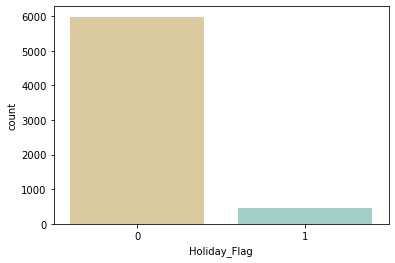

In [7]:
sns.countplot(x='Holiday_Flag',data=data,palette='BrBG')

<AxesSubplot:xlabel='Weekly_Sales', ylabel='Holiday_Flag'>

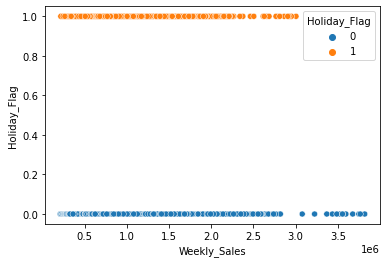

In [7]:
#sns.scatterplot(x='Weekly_Sales',y='Holiday_Flag',data=data,hue='Holiday_Flag')